<div align="center">

# <span style="color: #3498db;">CA2 - Genetic & Game</span>

**<span style="color:rgb(247, 169, 0);">Parsa Ahmadi Nav</span> - <span style="color:rgb(143, 95, 195);">810101609</span>**

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.6;">

### 📊 Matplotlib – Data Visualization in Python  

matplotlib is a python library that is mainly used for data visualization. This library allows you to plot different type of figures including scatters and histograms. In the first part of this project you are supposed to implement a genetic algorithm. To visualize plots that are required in the project description use plotting as much as you can because it gives a great insight on what is happening during each run. It also helps you to compare your results whenevever you want to understand effect of different parameters during different runs.
For more information, check [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) and visit [the website](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py).

In [8]:
import matplotlib.pyplot as plt

# <span style="color: #3498db;">Genetic Algorithm</span>

In [9]:
import random
import itertools
import numpy as np

In [10]:
# algorithm parameters
numCoeffs = 41
populationSize = 100
generations = 50
mutationRate = 0.15
functionRange = (-np.pi, np.pi)
sampleCount = 100

In [12]:
# These functions are given as samples to use in the algorithm
def getTargetFunction(functionName="sin_cos"):
    def sinCosFunction(t):
        """Target function: sin(2πt) + 0.5*cos(4πt)."""
        return np.sin(2 * np.pi * t) + 0.5 * np.cos(4 * np.pi * t)

    def linearFunction(t):
        """Simple linear function: y = 2t + 1."""
        return 2 * t + 1

    def quadraticFunction(t):
        """Quadratic function: y = 4t^2 - 4t + 2."""
        return (t**2) - t + 2

    def cubicFunction(t):
        """Cubic function: y = 8t^3 - 12t^2 + 6t."""
        return 8 * (t**3) - 12 * (t**2) + 6 * t

    def gaussianFunction(t):
        """Gaussian function centered at t=0.5."""
        mu = 0.5
        sigma = 0.1  # Adjust sigma to control the width of the peak
        return np.exp(-((t - mu) ** 2) / (2 * sigma**2))

    def squareWaveFunction(t):
        """Approximation of a square wave. Smoothed for better Fourier approximation."""
        return 0.5 * (np.sign(np.sin(2 * np.pi * t)) + 1)

    def sawtoothFunction(t):
        """Sawtooth wave, normalized to [0, 1]."""
        return (t * 5) % 1

    def complexFourierFunction(t):
        return (
            np.sin(2 * np.pi * t)
            + 0.3 * np.cos(4 * np.pi * t)
            + 0.2 * np.sin(6 * np.pi * t)
            + 0.1 * np.cos(8 * np.pi * t)
        )

    def polynomialFunction(t):
        return 10 * (t**5) - 20 * (t**4) + 15 * (t**3) - 4 * (t**2) + t + 0.5

    functionOptions = {
        "sin_cos": sinCosFunction,
        "linear": linearFunction,
        "quadratic": quadraticFunction,
        "cubic": cubicFunction,
        "gaussian": gaussianFunction,
        "square_wave": squareWaveFunction,
        "sawtooth": sawtoothFunction,
        "complex_fourier": complexFourierFunction,
        "polynomial": polynomialFunction,
    }

    selectedFunction = functionOptions.get(functionName.lower())
    if selectedFunction:
        return selectedFunction

In [13]:
# generate samples
tSamples = np.linspace(functionRange[0], functionRange[1], sampleCount)
fSamples = getTargetFunction()(tSamples)

<div style="color:rgb(235, 66, 32); font-weight: bold;">⚠️ Important Note:</div>  

Using **NumPy arrays** allows you to perform operations on vectors **more efficiently** and **faster**.

**Avoid using `for` loops** whenever possible, as vectorized operations in NumPy are **optimized for performance** and significantly reduce execution time.  


BLX-α : http://www.tomaszgwiazda.com/blendX.htm

SBX : https://stackoverflow.com/questions/22457941/simulated-binary-crossover-sbx-crossover-operator-example


In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Optional, Callable, Literal

@dataclass
class Consts:
    population_size: int
    generations: int
    mutation_rate: float
    crossover_rate: float
    coefficient_range: float
    tournament_size: int = 5
    elite_size: int = 5
    adaptive_mutation: bool = True
    final_mutation_rate: float = 0.05
    scale_fitness: bool = True
    fitness_power: float = 2.0
    mutation_scale: float = 0.05
    crossover_type: str = "two_point"

consts = Consts(
    population_size=200,
    generations=150,
    mutation_rate=0.2,
    crossover_rate=0.85,
    coefficient_range=5.0,
    tournament_size=5,
    elite_size=10,
    adaptive_mutation=True,
    final_mutation_rate=0.05,
    scale_fitness=True,
    fitness_power=2.0,
    mutation_scale=0.05,
    crossover_type="two_point"
)

def get_function_specific_constants(function_name: str) -> Consts:
    if function_name.lower() == "polynomial":
        return Consts(
            population_size=300,
            generations=200,
            mutation_rate=0.25,
            crossover_rate=0.9,
            coefficient_range=10.0,
            tournament_size=7,
            elite_size=15,
            adaptive_mutation=True,
            final_mutation_rate=0.10,
            scale_fitness=True,
            fitness_power=1.5,
            mutation_scale=0.08,
            crossover_type="blend"
        )
    elif function_name.lower() == "cubic":
        return Consts(
            population_size=250,
            generations=180,
            mutation_rate=0.22,
            crossover_rate=0.88,
            coefficient_range=8.0,
            tournament_size=6,
            elite_size=12,
            adaptive_mutation=True,
            final_mutation_rate=0.08,
            scale_fitness=True,
            fitness_power=1.8,
            mutation_scale=0.07,
            crossover_type="uniform"
        )
    elif function_name.lower() == "quadratic":
        return Consts(
            population_size=200,
            generations=150,
            mutation_rate=0.2,
            crossover_rate=0.85,
            coefficient_range=7.0,
            tournament_size=5,
            elite_size=10,
            adaptive_mutation=True,
            final_mutation_rate=0.05,
            scale_fitness=True,
            fitness_power=2.0,
            mutation_scale=0.06,
            crossover_type="sbx"
        )
    else:
        return consts

class Chromosome:
    def __init__(self, coefficients: Optional[list[float]] = None, num_coeffs: int = 41):
        if coefficients is not None:
            self.coefficients = coefficients
        else:
            self.coefficients = [random.uniform(-consts.coefficient_range, consts.coefficient_range) 
                                for _ in range(num_coeffs)]
        self.fitness = 0.0
        self.rmse = float('inf')
        self.mae = float('inf')
        self.max_error = float('inf')
        self.r_squared = 0.0

    def mutate(self, generation: int = 0, max_generations: int = 50, function_constants: Optional[Consts] = None):
        constants = function_constants or consts
        current_mutation_rate = constants.mutation_rate
        
        if constants.adaptive_mutation:
            progress = generation / max_generations
            current_mutation_rate = constants.mutation_rate - (constants.mutation_rate - constants.final_mutation_rate) * progress
        
        for i in range(len(self.coefficients)):
            if random.random() < current_mutation_rate:
                delta = random.uniform(-constants.mutation_scale * constants.coefficient_range, 
                                      constants.mutation_scale * constants.coefficient_range)
                self.coefficients[i] = np.clip(
                    self.coefficients[i] + delta, 
                    -constants.coefficient_range, 
                    constants.coefficient_range
                )

    def mate(self, other: 'Chromosome', function_constants: Optional[Consts] = None) -> 'Chromosome':
        constants = function_constants or consts
        if random.random() < constants.crossover_rate:
            crossover_point1 = random.randint(1, len(self.coefficients) - 2)
            crossover_point2 = random.randint(crossover_point1 + 1, len(self.coefficients) - 1)
            
            new_coeffs = (
                self.coefficients[:crossover_point1] + 
                other.coefficients[crossover_point1:crossover_point2] + 
                self.coefficients[crossover_point2:]
            )
        else:
            new_coeffs = self.coefficients.copy()
        return Chromosome(new_coeffs, len(self.coefficients))
    
    def uniform_crossover(self, other: 'Chromosome', function_constants: Optional[Consts] = None, p: float = 0.5) -> 'Chromosome':
        constants = function_constants or consts
        if random.random() < constants.crossover_rate:
            new_coeffs = []
            for i in range(len(self.coefficients)):
                if random.random() < p:
                    new_coeffs.append(self.coefficients[i])
                else:
                    new_coeffs.append(other.coefficients[i])
        else:
            new_coeffs = self.coefficients.copy()
        return Chromosome(new_coeffs, len(self.coefficients))
    
    def blend_crossover(self, other: 'Chromosome', function_constants: Optional[Consts] = None, alpha: float = 0.5) -> 'Chromosome':
        constants = function_constants or consts
        if random.random() < constants.crossover_rate:
            new_coeffs = []
            for i in range(len(self.coefficients)):
                min_val = min(self.coefficients[i], other.coefficients[i])
                max_val = max(self.coefficients[i], other.coefficients[i])
                range_val = max_val - min_val
                min_bound = max(min_val - alpha * range_val, -constants.coefficient_range)
                max_bound = min(max_val + alpha * range_val, constants.coefficient_range)

                if min_bound == max_bound:
                    new_coeffs.append(min_bound + random.uniform(-0.01, 0.01))
                else:
                    new_coeffs.append(random.uniform(min_bound, max_bound))
        else:
            new_coeffs = self.coefficients.copy()
        return Chromosome(new_coeffs, len(self.coefficients))
    
    def simulated_binary_crossover(self, other: 'Chromosome', function_constants: Optional[Consts] = None, eta: float = 1.0) -> 'Chromosome':
        constants = function_constants or consts
        if random.random() < constants.crossover_rate:
            new_coeffs = []
            for i in range(len(self.coefficients)):
                if abs(self.coefficients[i] - other.coefficients[i]) > 1e-10:
                    x1, x2 = self.coefficients[i], other.coefficients[i]
                    if x1 > x2:
                        x1, x2 = x2, x1
                    
                    u = random.random()
                    
                    if u <= 0.5:
                        beta = (2*u)**(1/(eta+1))
                    else:
                        beta = (1/(2*(1-u)))**(1/(eta+1))
                    
                    c1 = 0.5*((1+beta)*x1 + (1-beta)*x2)
                    c2 = 0.5*((1-beta)*x1 + (1+beta)*x2)
                    
                    child = c1 if random.random() < 0.5 else c2
                    new_coeffs.append(np.clip(child, -constants.coefficient_range, constants.coefficient_range))
                else:
                    new_coeffs.append(self.coefficients[i] + random.uniform(-0.01, 0.01))
        else:
            new_coeffs = self.coefficients.copy()
        return Chromosome(new_coeffs, len(self.coefficients))

    def calc_fitness(self, tSamples: np.ndarray, fSamples: np.ndarray, metric: str = "rmse", function_constants: Optional[Consts] = None):
        constants = function_constants or consts
        approx = self.get_approximation(tSamples)
        
        errors = approx - fSamples
        squared_errors = errors ** 2
        abs_errors = np.abs(errors)
        
        self.rmse = np.sqrt(np.mean(squared_errors))
        
        self.mae = np.mean(abs_errors)
        
        self.max_error = np.max(abs_errors)
        
        ss_total = np.sum((fSamples - np.mean(fSamples)) ** 2)
        ss_residual = np.sum(squared_errors)
        self.r_squared = 1 - (ss_residual / (ss_total + 1e-10))
        
        if metric == "rmse":
            error_val = self.rmse
        elif metric == "mae":
            error_val = self.mae
        elif metric == "max_error":
            error_val = self.max_error
        elif metric == "r_squared":
            error_val = 1 - self.r_squared
        else:
            error_val = self.rmse
        
        if constants.scale_fitness:
            self.fitness = 1 / (error_val ** constants.fitness_power + 1e-10)
        else:
            self.fitness = 1 / (error_val + 1e-10)

    def __str__(self):
        return f"Fitness: {self.fitness:.6f}, RMSE: {self.rmse:.6f}, MAE: {self.mae:.6f}, R²: {self.r_squared:.6f}"
    
    def get_approximation(self, t: np.ndarray) -> np.ndarray:
        a0 = self.coefficients[0]
        n_terms = (len(self.coefficients) - 1) // 2
        n = np.arange(1, n_terms + 1)
        a = np.array(self.coefficients[1:n_terms + 1])
        b = np.array(self.coefficients[n_terms + 1:])

        cos_terms = np.cos(np.outer(n, t))
        sin_terms = np.sin(np.outer(n, t))
        sum_a = np.dot(a, cos_terms)
        sum_b = np.dot(b, sin_terms)
        
        return a0 / 2 + sum_a + sum_b

class Population:
    def __init__(self, tSamples: np.ndarray, fSamples: np.ndarray, num_coeffs: int = 41, 
                    fitness_metric: str = "rmse", function_constants: Optional[Consts] = None):
        self.tSamples = tSamples
        self.fSamples = fSamples
        self.num_coeffs = num_coeffs
        self.fitness_metric = fitness_metric
        self.function_constants = function_constants or consts
        self.chromosomes = [Chromosome(num_coeffs=num_coeffs) for _ in range(self.function_constants.population_size)]
        self.best_per_generation = []
        self.crossover_stats = {"two_point": 0, "uniform": 0, "blend": 0, "sbx": 0}
    
        for chromo in self.chromosomes:
            chromo.calc_fitness(tSamples, fSamples, fitness_metric, self.function_constants)

    def evolve(self, generation: int):
        self.chromosomes.sort(key=lambda x: x.fitness, reverse=True)
        next_population = self.chromosomes[:self.function_constants.elite_size]
        
        self.best_per_generation.append(self.chromosomes[0].rmse)

        while len(next_population) < self.function_constants.population_size:
            parent1 = self._tournament_select()
            parent2 = self._tournament_select()
            
            crossover_type = self.function_constants.crossover_type.lower()
            if crossover_type == "uniform":
                child = parent1.uniform_crossover(parent2, self.function_constants)
                self.crossover_stats["uniform"] += 1
            elif crossover_type == "blend":
                child = parent1.blend_crossover(parent2, self.function_constants)
                self.crossover_stats["blend"] += 1
            elif crossover_type == "sbx":
                child = parent1.simulated_binary_crossover(parent2, self.function_constants)
                self.crossover_stats["sbx"] += 1
            else:
                child = parent1.mate(parent2, self.function_constants)
                self.crossover_stats["two_point"] += 1
            
            child.mutate(generation, self.function_constants.generations, self.function_constants)
            child.calc_fitness(self.tSamples, self.fSamples, self.fitness_metric, self.function_constants)
            next_population.append(child)
            
        self.chromosomes = next_population

    def _tournament_select(self):
        tournament = random.sample(self.chromosomes, self.function_constants.tournament_size)
        return max(tournament, key=lambda x: x.fitness)

    def best_chromosome(self) -> Chromosome:
        return max(self.chromosomes, key=lambda x: x.fitness)

    def run_ga(self, verbose=True) -> Chromosome:
        for gen in range(self.function_constants.generations):
            self.evolve(gen)
            best = self.best_chromosome()
            
            if verbose and (gen % 10 == 0 or gen == self.function_constants.generations - 1):
                print(f"Generation {gen+1}: {best}")
        
        return self.best_chromosome()

    def plot_convergence(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.best_per_generation)
        plt.xlabel("Generation")
        plt.ylabel("Best RMSE")
        plt.title(f"Convergence of Genetic Algorithm using {self.function_constants.crossover_type} crossover")
        plt.grid(True)
        plt.yscale('log')
        plt.show()

def plot_results(tSamples, fSamples, best_chromosome, function_name, function_constants=None, fitness_metric="rmse"):
    approx = best_chromosome.get_approximation(tSamples)

    plt.figure(figsize=(12, 7))
    plt.plot(tSamples, fSamples, 'b-', label="True Function", linewidth=2)
    plt.plot(tSamples, approx, 'r--', label="Fourier Approximation", linewidth=2)
    plt.xlabel("t", fontsize=12)
    plt.ylabel("f(t)", fontsize=12)
    title = f"Fourier Series Approximation for {function_name} function\n"
    title += f"RMSE: {best_chromosome.rmse:.6f}, MAE: {best_chromosome.mae:.6f}, R²: {best_chromosome.r_squared:.6f}"
    plt.title(title, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    plt.figure(figsize=(12, 4))
    error = approx - fSamples
    plt.plot(tSamples, error, 'g-', label="Error")
    plt.xlabel("t", fontsize=12)
    plt.ylabel("Error", fontsize=12)
    plt.title(f"Approximation Error (Max Error: {best_chromosome.max_error:.6f})", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.show()

    significant_coeffs = [(i, coef) for i, coef in enumerate(best_chromosome.coefficients) 
                            if abs(coef) > 0.01]
    significant_coeffs.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print("\nSignificant Fourier coefficients (sorted by magnitude):")
    for idx, coef in significant_coeffs[:15]:
        if idx == 0:
            print(f"a0 = {coef:.4f}")
        elif idx <= (len(best_chromosome.coefficients) - 1) // 2:
            print(f"a{idx} = {coef:.4f}")
        else:
            n = idx - (len(best_chromosome.coefficients) - 1) // 2
            print(f"b{n} = {coef:.4f}")

def run_optimization_for_samples(tSamples, fSamples, function_name="custom", num_fourier_terms=20, 
                                fitness_metric="rmse", crossover_type=None):
    total_coeffs = 2 * num_fourier_terms + 1
    
    function_constants = get_function_specific_constants(function_name)
    
    if crossover_type:
        function_constants.crossover_type = crossover_type
    
    print(f"\nOptimizing {function_name} function with:")
    print(f"- Population size: {function_constants.population_size}")
    print(f"- Generations: {function_constants.generations}")
    print(f"- Fitness metric: {fitness_metric}")
    print(f"- Crossover type: {function_constants.crossover_type}")
    print(f"- Number of Fourier terms: {num_fourier_terms}")
    
    population = Population(tSamples, fSamples, num_coeffs=total_coeffs, 
                            fitness_metric=fitness_metric, function_constants=function_constants)
    
    best = population.run_ga(verbose=True)
    
    print(f"\nOptimization Results for {function_name} function:")
    print(f"Number of samples: {len(tSamples)}")
    print(f"Number of Fourier terms: {num_fourier_terms}")
    print(f"Crossover type: {function_constants.crossover_type}")
    print(f"Crossover statistics: {population.crossover_stats}")
    print(f"Best RMSE: {best.rmse:.6f}")
    print(f"Best MAE: {best.mae:.6f}") 
    print(f"Best Max Error: {best.max_error:.6f}")
    print(f"Best R-squared: {best.r_squared:.6f}")
    
    plot_results(tSamples, fSamples, best, function_name, function_constants, fitness_metric)
    population.plot_convergence()
    
    return best


Optimizing quadratic function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: sbx
- Number of Fourier terms: 20
Generation 1: Fitness: 0.007623, RMSE: 11.453840, MAE: 9.042714, R²: -9.609318
Generation 11: Fitness: 0.020994, RMSE: 6.901592, MAE: 5.574210, R²: -2.851978
Generation 21: Fitness: 0.054823, RMSE: 4.270899, MAE: 3.328612, R²: -0.475108
Generation 31: Fitness: 0.106966, RMSE: 3.057582, MAE: 2.510456, R²: 0.243966
Generation 41: Fitness: 0.161269, RMSE: 2.490147, MAE: 1.982410, R²: 0.498541
Generation 51: Fitness: 0.191966, RMSE: 2.282381, MAE: 1.951172, R²: 0.578729
Generation 61: Fitness: 0.238747, RMSE: 2.046592, MAE: 1.834438, R²: 0.661275
Generation 71: Fitness: 0.254011, RMSE: 1.984145, MAE: 1.846519, R²: 0.681630
Generation 81: Fitness: 0.261431, RMSE: 1.955786, MAE: 1.834632, R²: 0.690666
Generation 91: Fitness: 0.270211, RMSE: 1.923750, MAE: 1.841403, R²: 0.700717
Generation 101: Fitness: 0.274490, RMSE: 1.908697, MAE: 1.81725

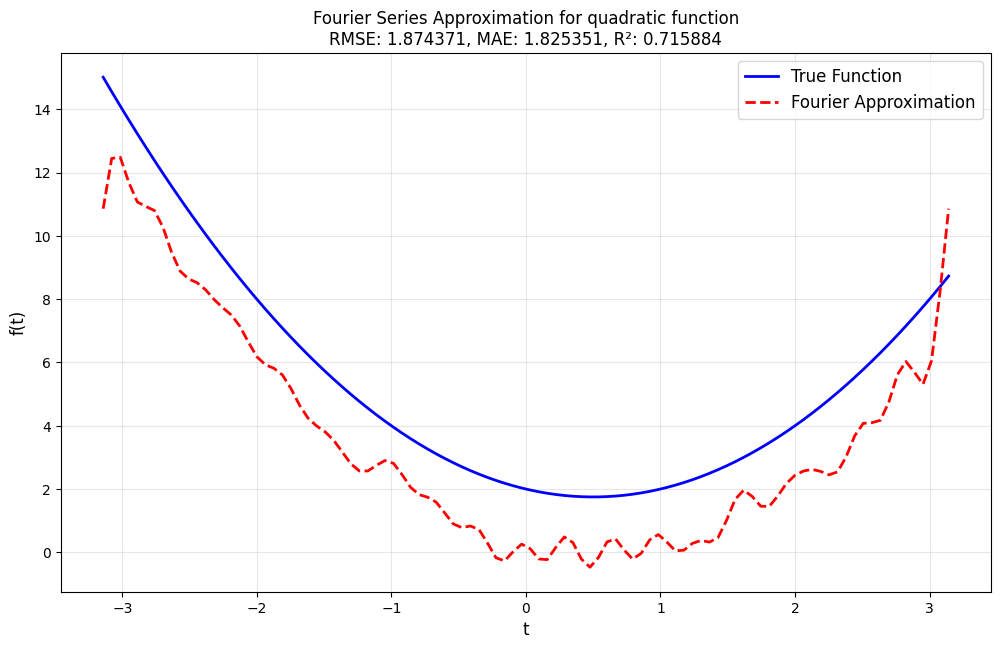

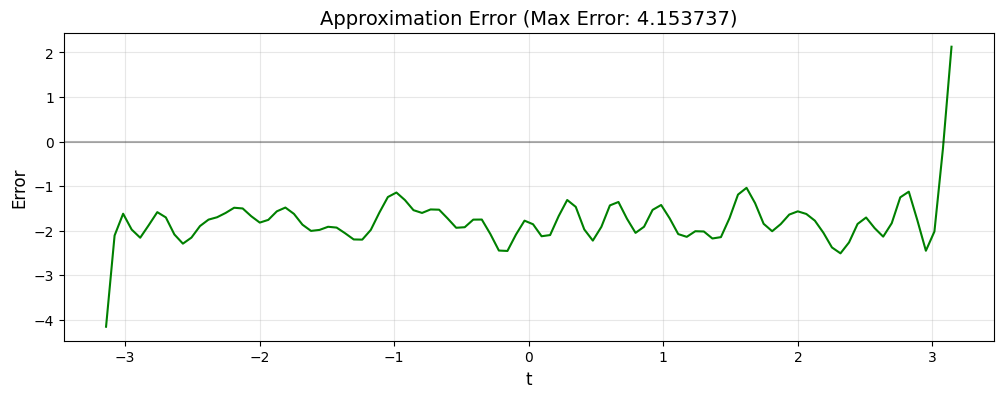


Significant Fourier coefficients (sorted by magnitude):
a0 = 7.0000
a1 = -4.0250
b1 = -2.0218
b2 = 1.0022
a2 = 0.9826
b3 = -0.6765
a3 = -0.5304
b4 = 0.4975
a5 = -0.3482
b6 = 0.3238
b7 = -0.2778
b8 = 0.2670
b10 = 0.2492
a4 = 0.2406
b5 = -0.2130


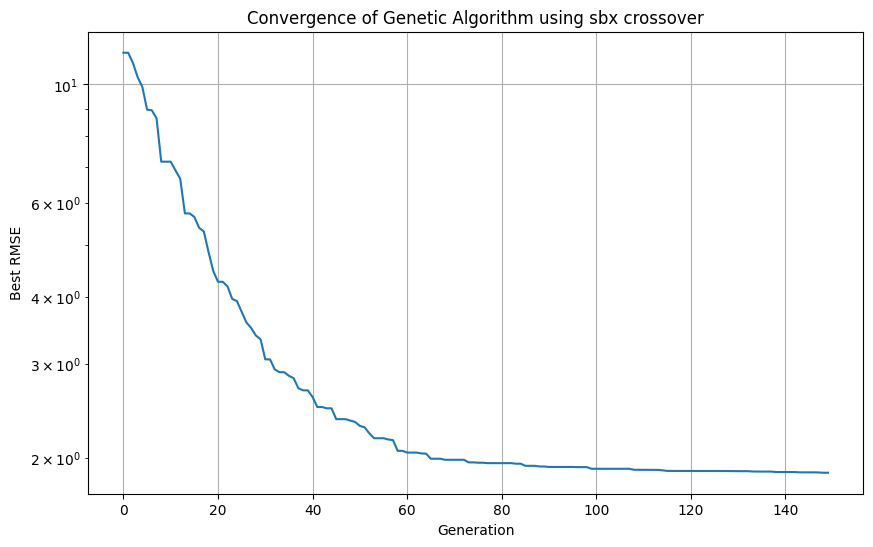


Best coefficients: [6.999986816604559, -4.0250002730579375, 0.9825515615577839, -0.5303769377587733, 0.2406262302330641, -0.34816924008136774, 0.1578702053585288, -0.009900213893149172, 0.09895200555313019, -0.09477064810630392, -0.032677767374110926, -0.06894402093035486, 0.13767956416177768, -0.05608468653974203, 0.029928518188267757, -0.0977297211532925, 0.09098599205499239, -0.08478031622504381, 0.17651263473138176, 0.004901828767544849, 0.16418358469980462, -2.021751644282957, 1.0021621422213638, -0.6765286895808589, 0.49750637623858873, -0.21300370784707787, 0.3237649262651418, -0.2777887109869823, 0.26697562517527523, -0.20210928582772672, 0.2491580287915887, -0.17037585902429392, 0.14732132137598708, -0.04099136156381577, 0.08333295556181355, -0.203774723370119, 0.15500056440459825, -0.12451828004746618, -0.0011339044810263089, -0.1513239948441944, 0.0473235417569083]


In [15]:
if __name__ == "__main__":
    fSamples = getTargetFunction("quadratic")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "quadratic", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing cubic function with:
- Population size: 250
- Generations: 180
- Fitness metric: rmse
- Crossover type: uniform
- Number of Fourier terms: 20
Generation 1: Fitness: 0.000198, RMSE: 114.188429, MAE: 71.894001, R²: -0.027166
Generation 11: Fitness: 0.000218, RMSE: 108.159536, MAE: 67.956912, R²: 0.078435
Generation 21: Fitness: 0.000230, RMSE: 104.995516, MAE: 66.562202, R²: 0.131564
Generation 31: Fitness: 0.000238, RMSE: 103.010987, MAE: 65.835791, R²: 0.164082
Generation 41: Fitness: 0.000242, RMSE: 102.111672, MAE: 64.636280, R²: 0.178614
Generation 51: Fitness: 0.000244, RMSE: 101.690204, MAE: 63.946715, R²: 0.185381
Generation 61: Fitness: 0.000244, RMSE: 101.561687, MAE: 63.752312, R²: 0.187438
Generation 71: Fitness: 0.000245, RMSE: 101.490341, MAE: 63.438045, R²: 0.188580
Generation 81: Fitness: 0.000245, RMSE: 101.465746, MAE: 63.390749, R²: 0.188973
Generation 91: Fitness: 0.000245, RMSE: 101.461903, MAE: 63.353789, R²: 0.189034
Generation 101: Fitness: 0.000245, R

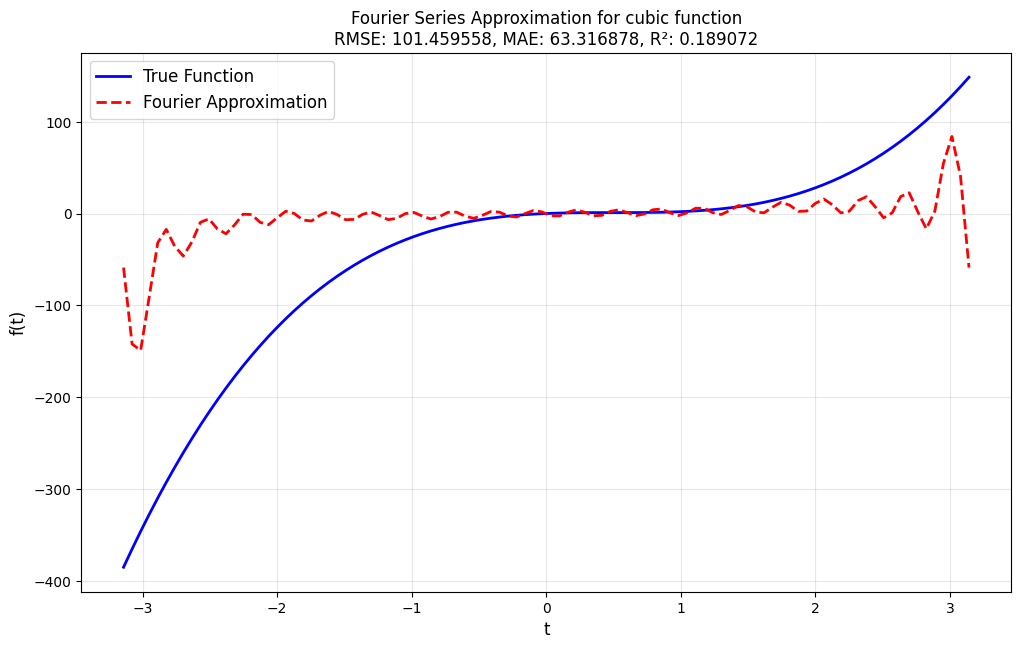

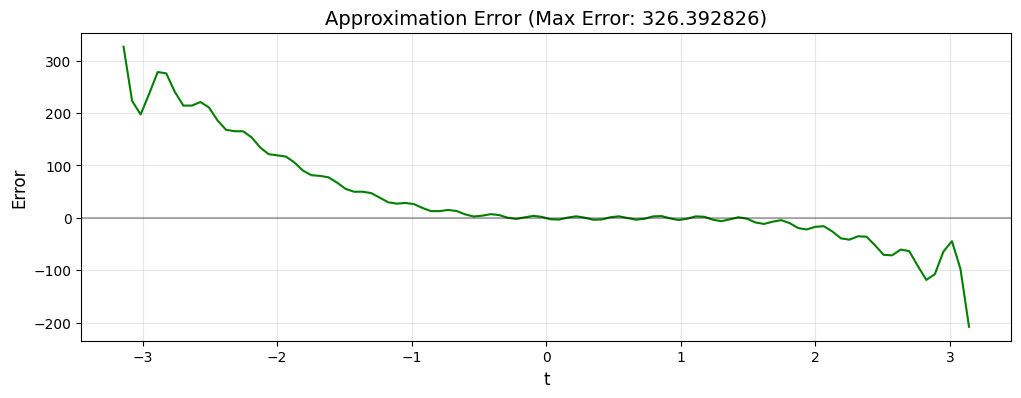


Significant Fourier coefficients (sorted by magnitude):
a0 = -8.0000
a1 = 8.0000
a2 = -8.0000
b1 = 8.0000
b2 = -8.0000
b3 = 8.0000
b4 = -8.0000
b5 = 8.0000
b6 = -8.0000
b7 = 8.0000
b8 = -8.0000
b9 = 8.0000
b10 = -8.0000
b11 = 8.0000
b12 = -8.0000


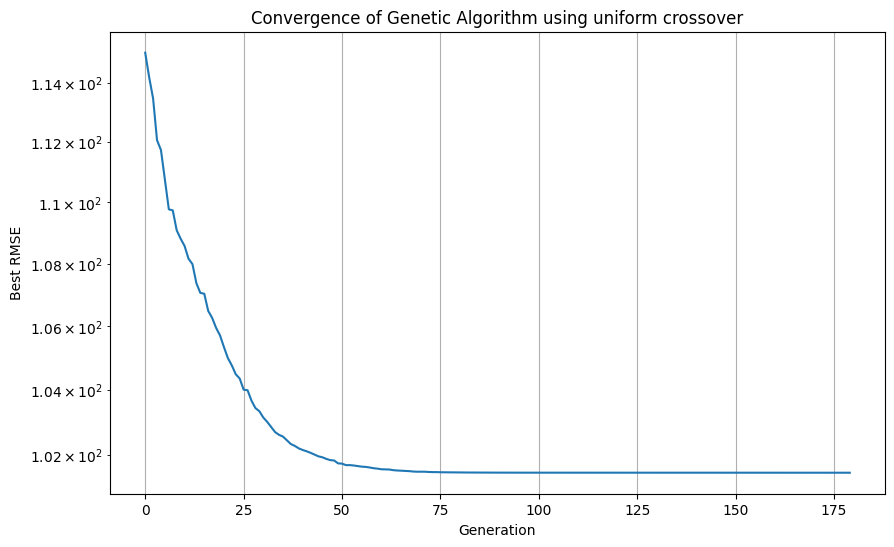


Best coefficients: [-8.0, 8.0, -8.0, 6.559466286040622, -4.295726606744479, 3.129621128198109, -2.544679616130634, 2.2652852727732213, -1.9313656366534144, 1.8547630775990318, -1.6761420177357016, 1.5898863889063257, -1.636541309615672, 1.5499687605035444, -1.5652170031707497, 1.4726849330016711, -1.4101434394754566, 1.4242782272040795, -1.3336494842136906, 1.4042450029865576, -1.2985321561082237, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 8.0, -8.0, 7.818459533884899, -7.28965827152735]


In [16]:
if __name__ == "__main__":
    fSamples = getTargetFunction("cubic")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "cubic", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing polynomial function with:
- Population size: 300
- Generations: 200
- Fitness metric: rmse
- Crossover type: blend
- Number of Fourier terms: 20
Generation 1: Fitness: 0.000021, RMSE: 1333.902720, MAE: 657.674673, R²: -0.096337
Generation 11: Fitness: 0.000021, RMSE: 1321.858391, MAE: 651.878343, R²: -0.076627
Generation 21: Fitness: 0.000021, RMSE: 1316.655319, MAE: 648.266252, R²: -0.068169
Generation 31: Fitness: 0.000021, RMSE: 1314.006546, MAE: 647.948313, R²: -0.063875
Generation 41: Fitness: 0.000021, RMSE: 1312.798191, MAE: 646.068622, R²: -0.061919
Generation 51: Fitness: 0.000021, RMSE: 1312.169927, MAE: 645.980297, R²: -0.060903
Generation 61: Fitness: 0.000021, RMSE: 1311.787238, MAE: 645.365661, R²: -0.060284
Generation 71: Fitness: 0.000021, RMSE: 1311.587141, MAE: 645.427072, R²: -0.059961
Generation 81: Fitness: 0.000021, RMSE: 1311.486354, MAE: 645.526143, R²: -0.059798
Generation 91: Fitness: 0.000021, RMSE: 1311.415994, MAE: 645.386237, R²: -0.059684
Gene

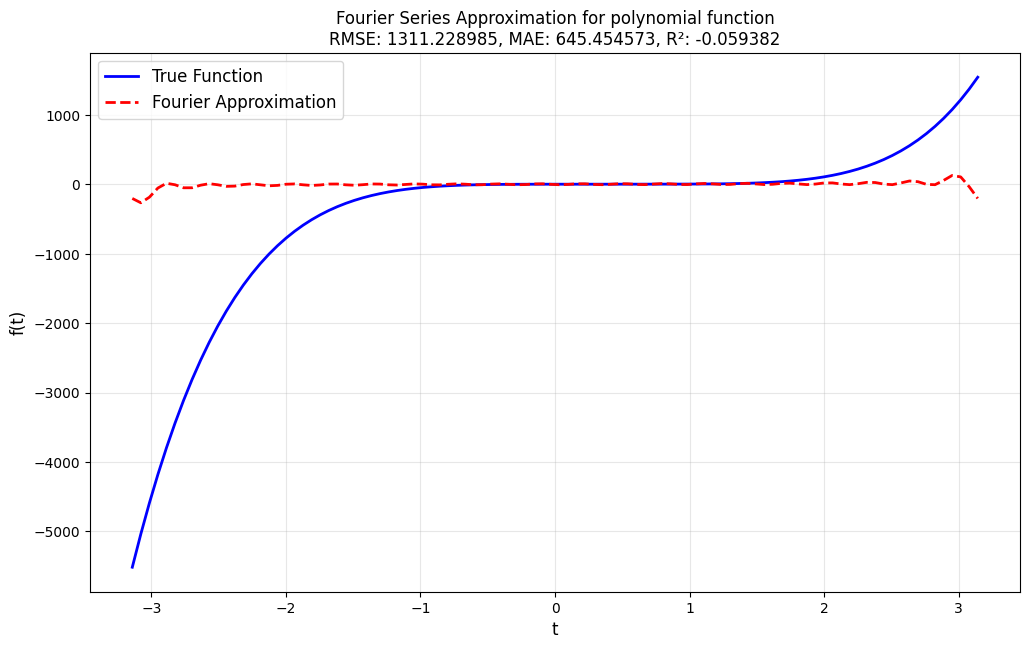

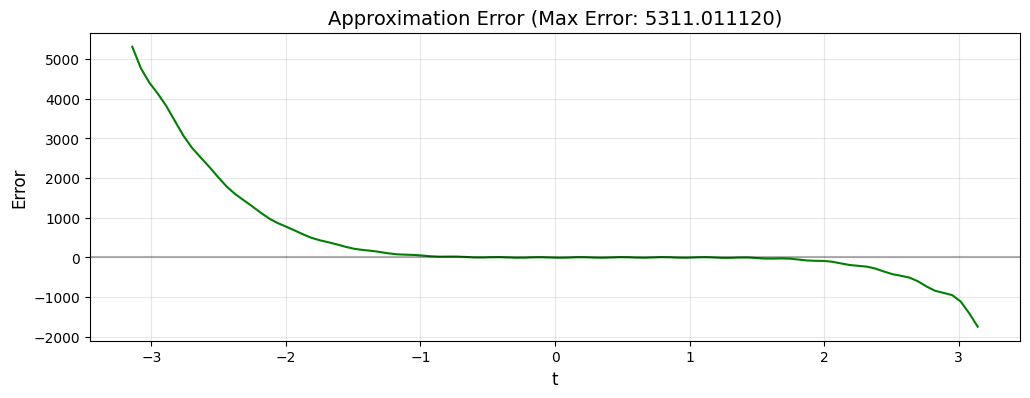


Significant Fourier coefficients (sorted by magnitude):
a7 = 10.0073
b17 = 10.0055
b3 = 10.0025
b8 = -10.0020
a4 = -10.0018
a0 = -10.0014
b10 = -10.0014
b4 = -10.0014
b2 = -10.0011
b5 = 10.0010
a15 = 10.0006
a14 = -10.0006
a2 = -10.0000
a3 = 10.0000
a16 = -10.0000


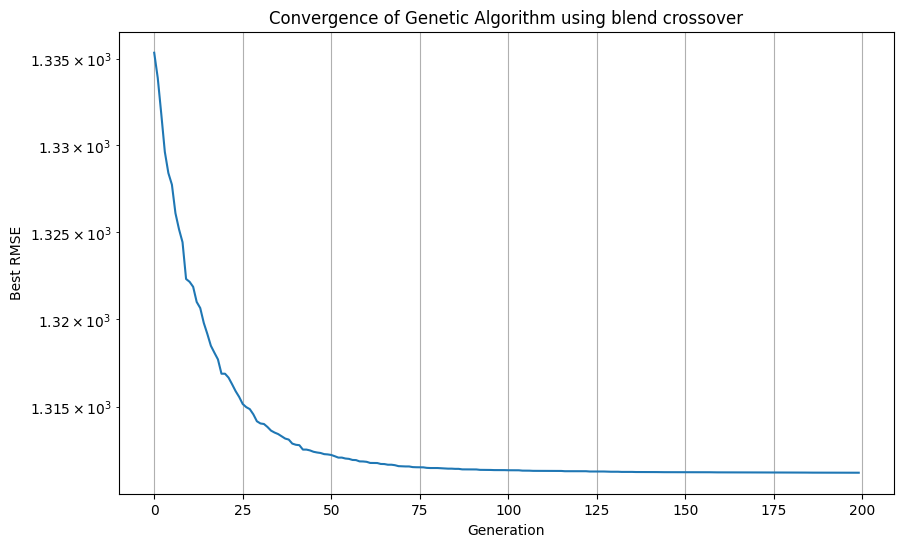


Best coefficients: [-10.001418121091953, 9.99979113352034, -10.0, 10.0, -10.00184228036292, 9.970895759404982, -9.986104903063284, 10.007328769520878, -9.97891520962964, 9.995413160978234, -9.895506643096178, 9.99372174207266, -9.997283168396345, 9.934476671893236, -10.000564386848195, 10.000591632859193, -10.0, 9.837737107779125, -10.0, 9.992386090820755, -9.98844158639989, 9.993934349516234, -10.001114743704756, 10.002469605172776, -10.001378427679384, 10.00103838065784, -10.0, 9.997267024653674, -10.001981156296356, 9.995208183527161, -10.00140164983563, 10.0, -9.992944538606073, 9.98723597055279, -9.986488829046964, 9.997546705873335, -9.98931810277114, 10.00552198361344, -10.0, 10.0, -9.976998137044262]


In [17]:
if __name__ == "__main__":
    fSamples = getTargetFunction("polynomial")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "polynomial", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing sawtooth function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.010593, RMSE: 9.716294, MAE: 7.681315, R²: -1155.490685
Generation 11: Fitness: 0.032669, RMSE: 5.532607, MAE: 4.746424, R²: -373.973365
Generation 21: Fitness: 0.064804, RMSE: 3.928248, MAE: 3.245848, R²: -188.033456
Generation 31: Fitness: 0.098980, RMSE: 3.178526, MAE: 2.659860, R²: -122.763406
Generation 41: Fitness: 0.196049, RMSE: 2.258490, MAE: 1.805122, R²: -61.485207
Generation 51: Fitness: 0.366155, RMSE: 1.652599, MAE: 1.307230, R²: -32.456128
Generation 61: Fitness: 0.868177, RMSE: 1.073238, MAE: 0.867633, R²: -13.110179
Generation 71: Fitness: 2.540322, RMSE: 0.627416, MAE: 0.494001, R²: -3.822276
Generation 81: Fitness: 4.558733, RMSE: 0.468358, MAE: 0.358338, R²: -1.687179
Generation 91: Fitness: 6.690651, RMSE: 0.386604, MAE: 0.311640, R²: -0.830933
Generation 101: Fitness: 7.442650, RMSE:

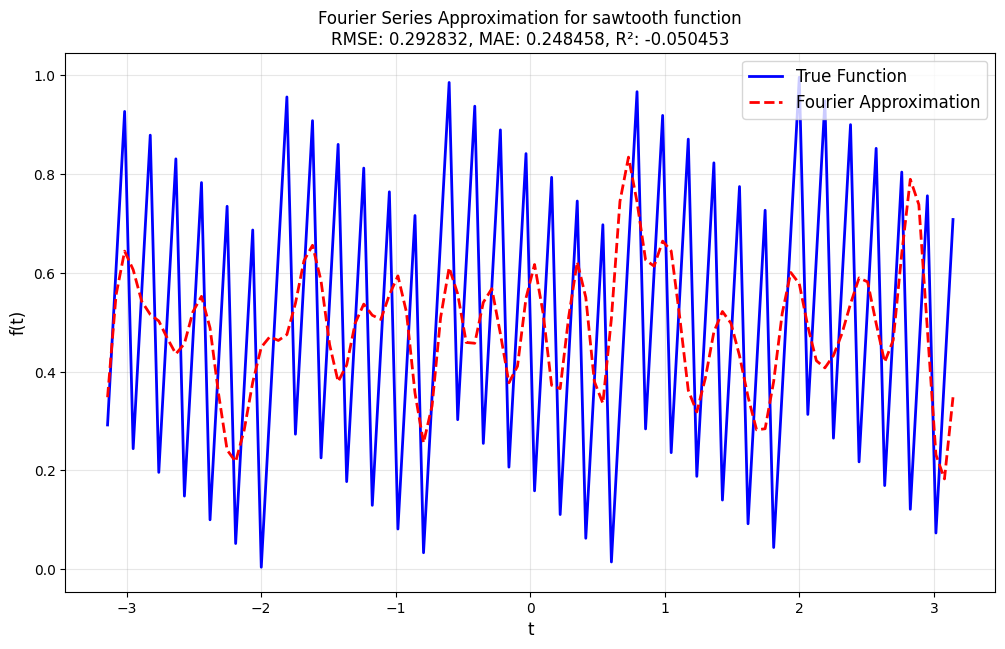

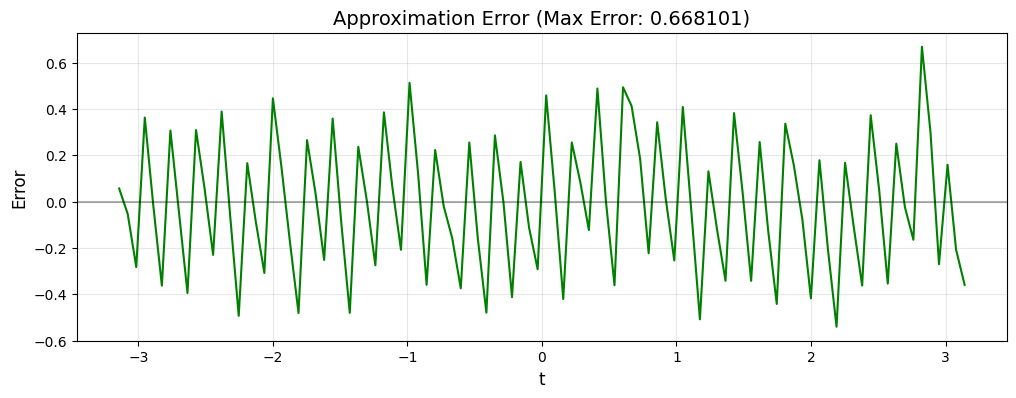


Significant Fourier coefficients (sorted by magnitude):
a0 = 0.9766
b10 = 0.0643
b5 = -0.0534
b18 = 0.0519
a13 = 0.0517
b3 = 0.0477
a7 = 0.0454
a14 = -0.0437
b13 = -0.0406
b15 = -0.0355
a18 = 0.0354
a3 = -0.0344
b20 = 0.0326
a20 = 0.0319
a19 = 0.0308


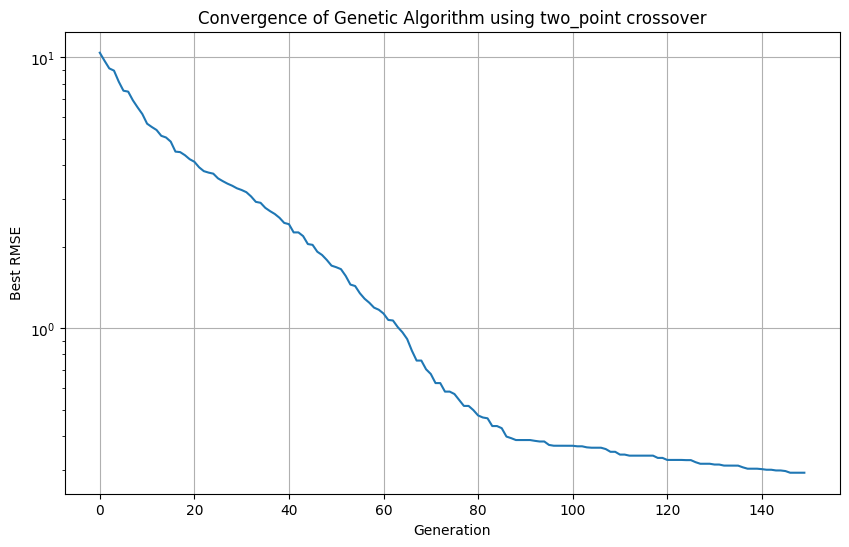


Best coefficients: [0.976584246457685, 0.016939544063029666, 0.019528108733379235, -0.034417823408783244, -0.016364167800406726, -0.0022219810209860857, -0.019893389108654458, 0.04538182551713976, -0.010605553764971076, 0.004305449801164818, -0.009413707470251331, 0.00714305653401015, -0.015342607840700129, 0.05172803896735628, -0.04367749852051028, 0.0027118878982920758, 0.015334971135028241, 0.004724313339170116, 0.035435501550920234, 0.03083694695695932, 0.031941751152139264, 0.016668330658051733, 0.0038082490736207064, 0.047698148212407754, 0.0015006040635969775, -0.053373018174018905, -0.015395298293445492, -0.004747832130781171, -0.011231945279160938, 0.013840991399302727, 0.06433156495138759, -0.0037786467493112763, -0.00402092752408606, -0.04064761645035919, 0.026949591578022902, -0.035511765972087495, -0.004503798681045834, -0.01842653908886982, 0.05193741519829437, 0.013569457167480536, 0.032584683023314076]


In [18]:
if __name__ == "__main__":
    fSamples = getTargetFunction("sawtooth")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "sawtooth", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing square_wave function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.009720, RMSE: 10.142951, MAE: 8.179356, R²: -410.517858
Generation 11: Fitness: 0.035348, RMSE: 5.318814, MAE: 4.304221, R²: -112.159109
Generation 21: Fitness: 0.077415, RMSE: 3.594067, MAE: 2.885022, R²: -50.669275
Generation 31: Fitness: 0.157253, RMSE: 2.521741, MAE: 2.109905, R²: -24.436704
Generation 41: Fitness: 0.346113, RMSE: 1.699774, MAE: 1.390515, R²: -10.556922
Generation 51: Fitness: 1.089556, RMSE: 0.958022, MAE: 0.759826, R²: -2.671221
Generation 61: Fitness: 2.975025, RMSE: 0.579769, MAE: 0.459966, R²: -0.344526
Generation 71: Fitness: 5.712822, RMSE: 0.418384, MAE: 0.339072, R²: 0.299821
Generation 81: Fitness: 8.917763, RMSE: 0.334867, MAE: 0.271468, R²: 0.551457
Generation 91: Fitness: 12.799324, RMSE: 0.279516, MAE: 0.226225, R²: 0.687483
Generation 101: Fitness: 13.219643, RMSE: 0

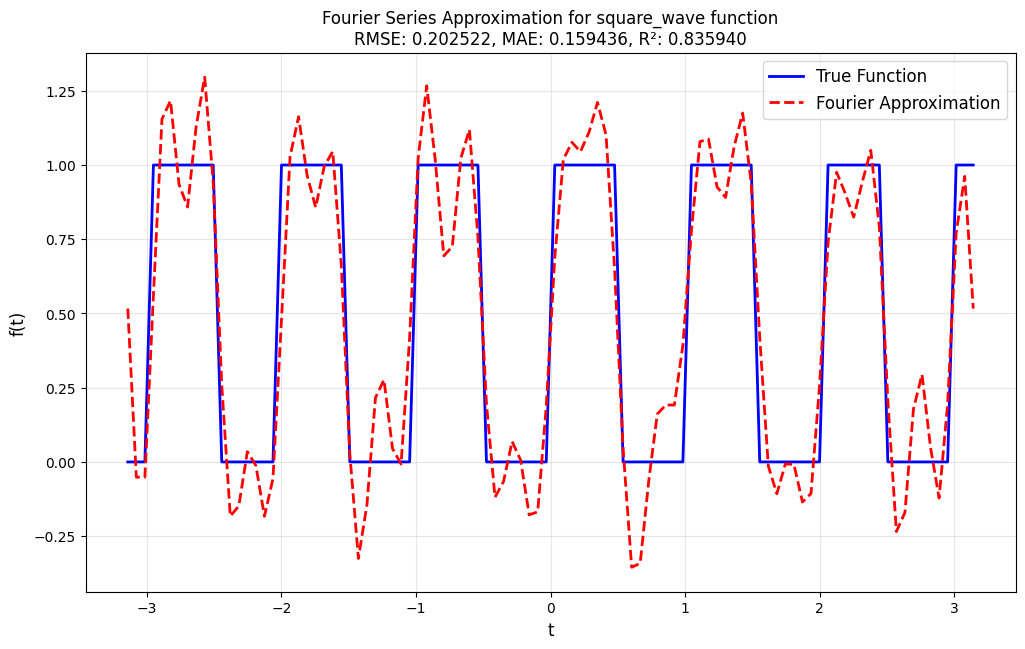

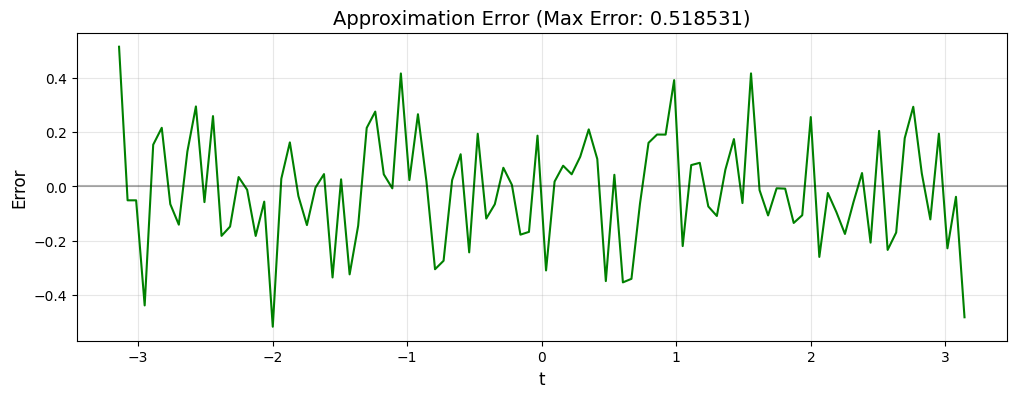


Significant Fourier coefficients (sorted by magnitude):
a0 = 0.9735
b6 = 0.5327
b19 = 0.2633
b7 = 0.2225
b9 = 0.1633
b8 = -0.1428
b20 = -0.1023
b17 = 0.0746
b3 = -0.0660
a20 = 0.0613
b4 = 0.0577
b16 = -0.0535
b12 = -0.0525
a5 = 0.0512
a3 = -0.0461


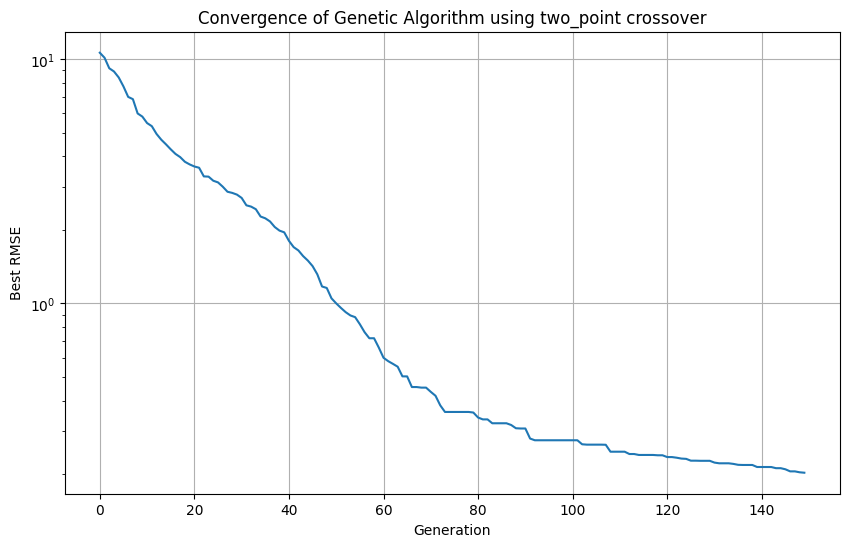


Best coefficients: [0.9734553805271016, 0.009141044018635136, -0.007158434663612878, -0.04609368574226397, -0.002328122730049953, 0.05122146070654626, 0.00375035100294302, 0.03913227030896482, -0.033077913889841604, -0.04455498478646652, -0.04255458861993011, -0.01811071590798774, -0.007974324960563661, 0.011774614794083482, 0.016268780361386515, -0.0003032155958828664, 0.006625627531063549, -0.022111886091870925, -0.0022627404020953423, -0.01723252734962266, 0.061262826564892015, -0.011249807537317469, 0.044875498309786876, -0.06604108705740175, 0.05768749098302295, -0.03790103727112348, 0.5326974723821546, 0.22248511137824378, -0.14283679170050273, 0.1633273499770891, -0.019055773334931525, 0.01730500342725877, -0.05251476631247559, -0.004070328666496537, -0.022029443091637402, 0.004770488572255427, -0.0534677884602735, 0.07461445617809881, 0.038695271259627406, 0.26326754506362204, -0.1023372625041179]


In [19]:
if __name__ == "__main__":
    fSamples = getTargetFunction("square_wave")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "square_wave", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing sin_cos function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.009168, RMSE: 10.443996, MAE: 8.232822, R²: -177.033694
Generation 11: Fitness: 0.024518, RMSE: 6.386391, MAE: 5.192647, R²: -65.570195
Generation 21: Fitness: 0.039699, RMSE: 5.018916, MAE: 3.839720, R²: -40.113897
Generation 31: Fitness: 0.057019, RMSE: 4.187857, MAE: 3.189104, R²: -27.625459
Generation 41: Fitness: 0.095631, RMSE: 3.233711, MAE: 2.579610, R²: -16.067555
Generation 51: Fitness: 0.169744, RMSE: 2.427186, MAE: 1.913747, R²: -8.615564
Generation 61: Fitness: 0.333752, RMSE: 1.730965, MAE: 1.415420, R²: -3.890410
Generation 71: Fitness: 0.697043, RMSE: 1.197761, MAE: 0.983099, R²: -1.341582
Generation 81: Fitness: 1.666421, RMSE: 0.774654, MAE: 0.608816, R²: 0.020546
Generation 91: Fitness: 4.926703, RMSE: 0.450528, MAE: 0.342164, R²: 0.668707
Generation 101: Fitness: 9.452520, RMSE: 0.32525

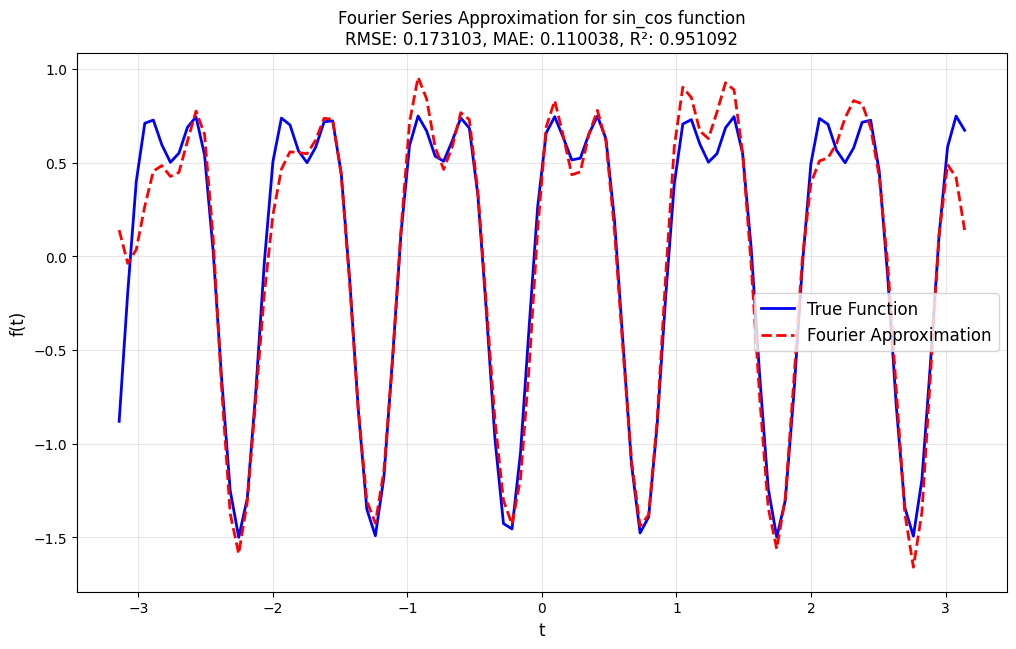

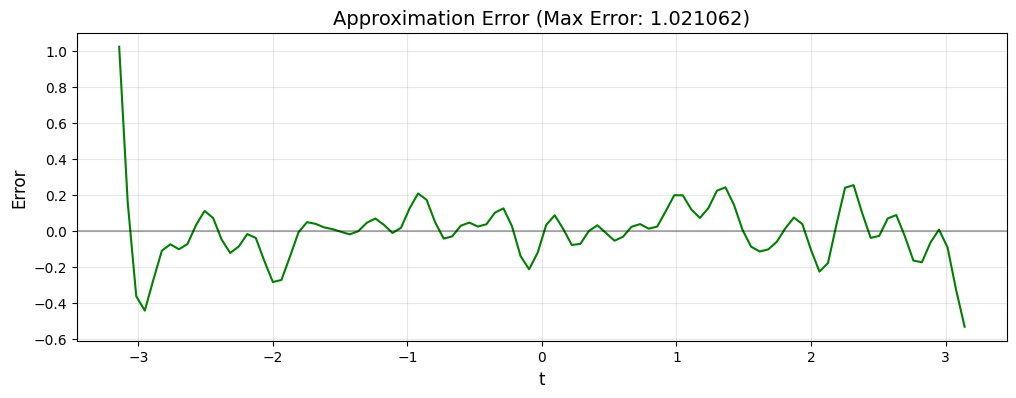


Significant Fourier coefficients (sorted by magnitude):
b6 = 0.8626
b7 = 0.3933
a13 = 0.3429
a12 = 0.2731
b5 = -0.1832
b8 = -0.1825
a11 = -0.1193
b9 = 0.1079
b11 = 0.1024
a9 = -0.0953
b10 = -0.0801
a10 = 0.0734
b4 = 0.0669
a8 = 0.0611
a3 = -0.0596


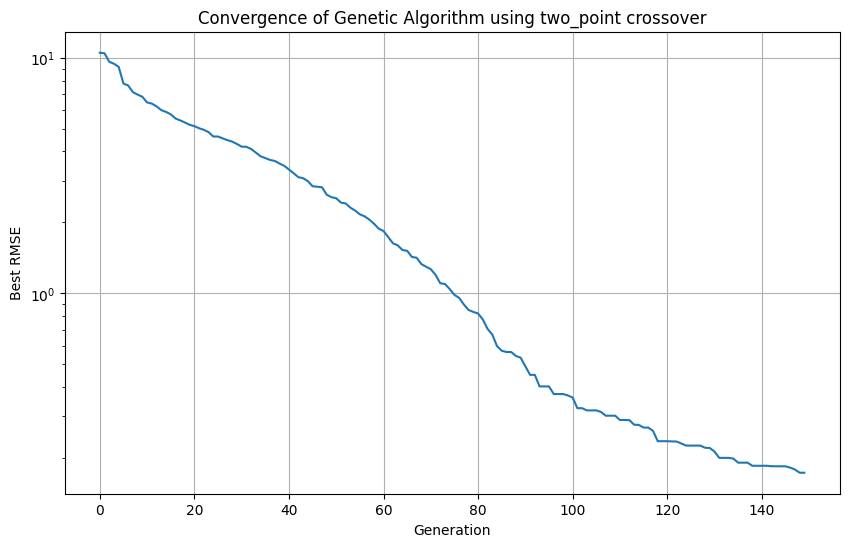


Best coefficients: [0.005499066102704175, 0.02960766107951579, -0.014106773529678873, -0.05960082723295679, -0.015574740860922032, 0.021244047778814223, 0.0219011418785392, -0.051216207227057386, 0.06106028284711901, -0.09526917408064622, 0.07337598816320645, -0.11925087095736653, 0.2731265326562083, 0.34291749835588203, -0.05050602746415894, 0.04242688688006274, -0.0481934734604732, 0.030050023063177667, -0.015999503869623732, 0.017771934000692657, 0.011555952659182744, 0.01698438444855488, 0.006455248497836907, -0.048730620494961574, 0.06687285741289023, -0.18320444010606685, 0.8625716179994259, 0.39328700886495627, -0.18245660764749932, 0.1078718076761302, -0.08014605141648434, 0.10244243409033477, -0.051606248596083704, 0.04358871339655418, -0.00048660810201017757, 0.05385478486263612, -0.05783084900018742, 0.05420363483809526, -0.012530292261454079, 0.024621237232238358, 0.041848804319171096]


In [20]:
if __name__ == "__main__":
    fSamples = getTargetFunction("sin_cos")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "sin_cos", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing complex_fourier function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.010115, RMSE: 9.942972, MAE: 8.107675, R²: -173.560012
Generation 11: Fitness: 0.031652, RMSE: 5.620852, MAE: 4.456814, R²: -54.784901
Generation 21: Fitness: 0.052097, RMSE: 4.381214, MAE: 3.517992, R²: -32.892318
Generation 31: Fitness: 0.082959, RMSE: 3.471916, MAE: 2.803466, R²: -20.283882
Generation 41: Fitness: 0.160400, RMSE: 2.496881, MAE: 2.017561, R²: -10.007994
Generation 51: Fitness: 0.296916, RMSE: 1.835200, MAE: 1.566881, R²: -4.946745
Generation 61: Fitness: 0.701223, RMSE: 1.194186, MAE: 0.966999, R²: -1.518003
Generation 71: Fitness: 2.191539, RMSE: 0.675500, MAE: 0.553296, R²: 0.194319
Generation 81: Fitness: 5.342378, RMSE: 0.432646, MAE: 0.356340, R²: 0.669495
Generation 91: Fitness: 7.876472, RMSE: 0.356315, MAE: 0.280309, R²: 0.775828
Generation 101: Fitness: 10.621331, RMSE: 

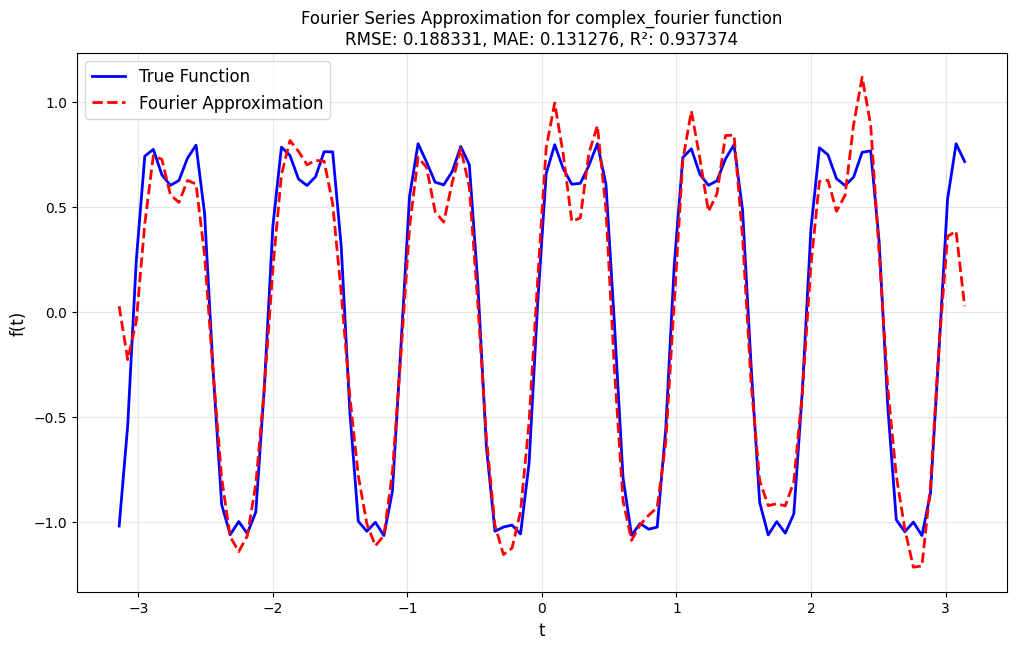

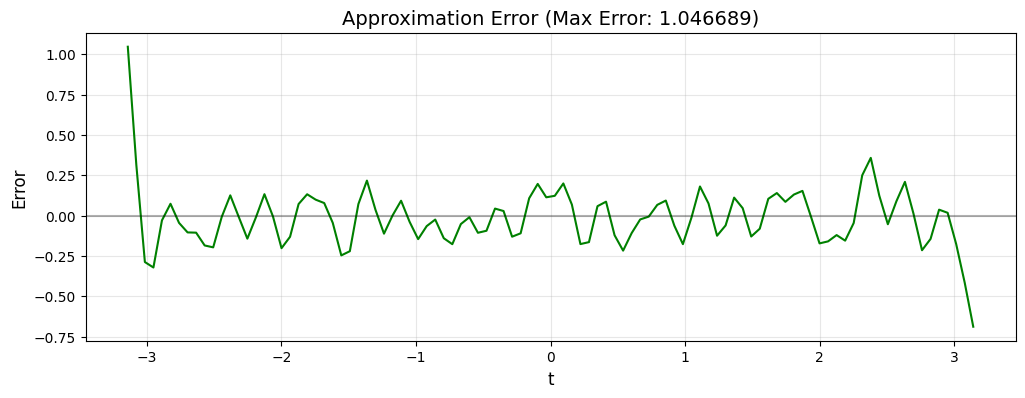


Significant Fourier coefficients (sorted by magnitude):
b6 = 0.8543
b7 = 0.3249
a13 = 0.2143
b19 = 0.1985
b5 = -0.1749
a12 = 0.1384
b8 = -0.1260
b9 = 0.1081
b10 = -0.0843
b11 = 0.0748
a10 = 0.0739
b4 = 0.0689
b12 = -0.0624
a9 = -0.0560
a8 = 0.0487


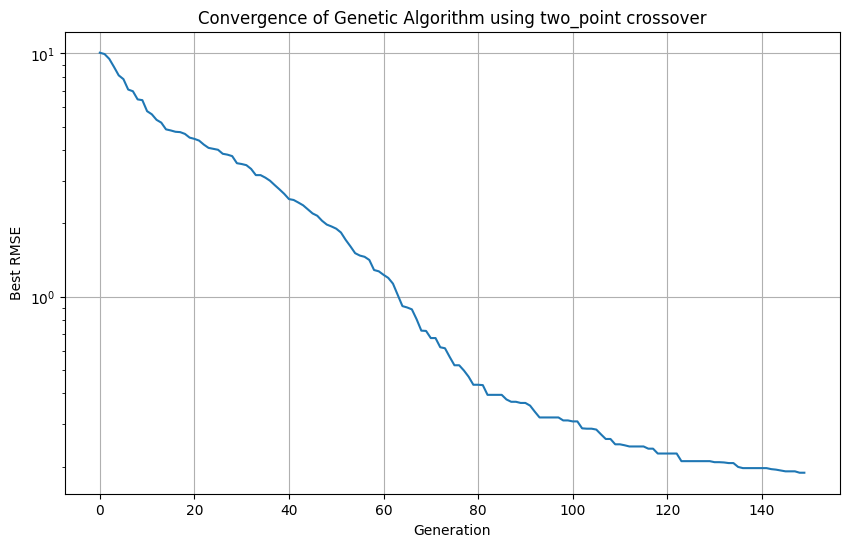


Best coefficients: [-0.02179610186808706, -0.003875453268604334, -0.0028577758009634135, 0.018273168209348156, 0.03078468143060137, 0.021853411688423252, 0.025630211989287277, 0.0004678353973007754, 0.0486805924720321, -0.05602526869270841, 0.07387913558615283, -0.026898198066682366, 0.13840990232047012, 0.21430980483148376, -0.01907132098027786, 0.03760179689735493, -0.0067973340402214255, 0.022594532344949902, 0.028584277358754073, 0.007076637971520416, -0.045707463572849105, 0.01144605726168968, 0.015354674455385353, -0.03417683513172104, 0.06893183124658803, -0.17490402516978587, 0.8543157465387455, 0.3248853102935002, -0.12604570990931285, 0.10806805061012065, -0.08430624415073723, 0.07482756689522485, -0.06244378013902979, 0.04290755394590212, -0.03937582152017144, 0.004475504392137841, -0.037826052662182585, 0.041449939666236724, 0.027322430492455974, 0.19851203552397023, -0.007700396338455262]


In [21]:
if __name__ == "__main__":
    fSamples = getTargetFunction("complex_fourier")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "complex_fourier", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing linear function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.010328, RMSE: 9.839747, MAE: 7.295332, R²: -6.211792
Generation 11: Fitness: 0.026154, RMSE: 6.183416, MAE: 4.726068, R²: -1.847949
Generation 21: Fitness: 0.041525, RMSE: 4.907345, MAE: 3.891482, R²: -0.793777
Generation 31: Fitness: 0.064623, RMSE: 3.933737, MAE: 3.178337, R²: -0.152620
Generation 41: Fitness: 0.102264, RMSE: 3.127072, MAE: 2.453181, R²: 0.271631
Generation 51: Fitness: 0.176684, RMSE: 2.379038, MAE: 1.924036, R²: 0.578422
Generation 61: Fitness: 0.324635, RMSE: 1.755102, MAE: 1.375000, R²: 0.770554
Generation 71: Fitness: 0.575730, RMSE: 1.317925, MAE: 0.896399, R²: 0.870623
Generation 81: Fitness: 0.828262, RMSE: 1.098794, MAE: 0.622945, R²: 0.910069
Generation 91: Fitness: 0.984958, RMSE: 1.007607, MAE: 0.481592, R²: 0.924376
Generation 101: Fitness: 1.045875, RMSE: 0.977823, MAE: 0.40

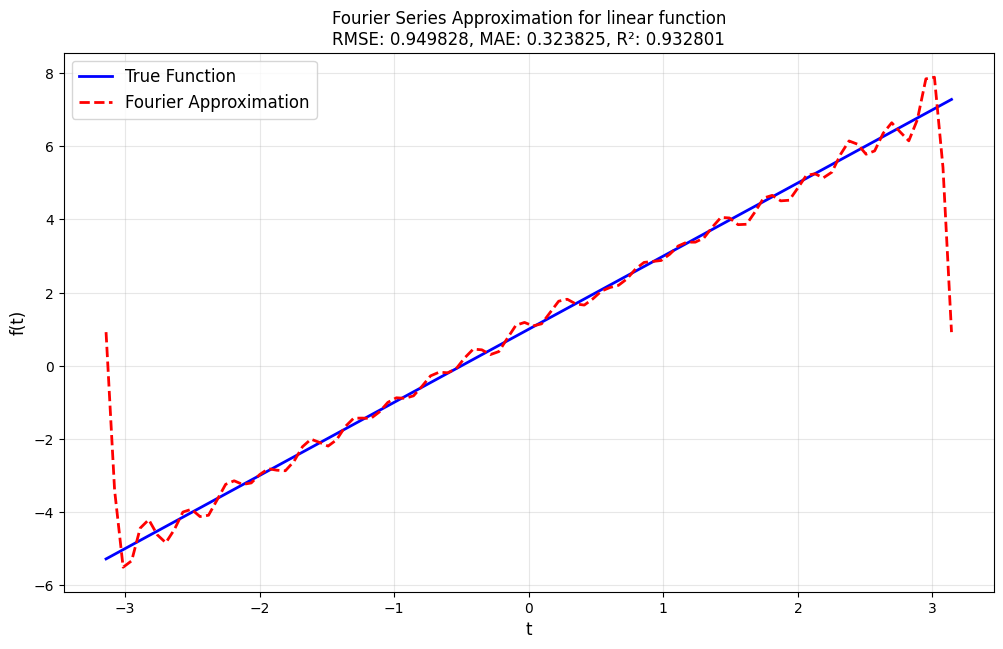

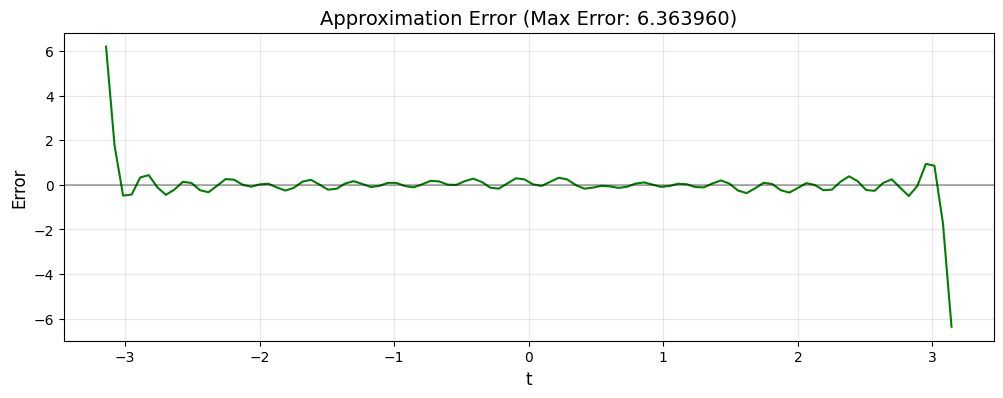


Significant Fourier coefficients (sorted by magnitude):
b1 = 3.9712
b2 = -2.0129
a0 = 2.0084
b3 = 1.3350
b4 = -1.0246
b5 = 0.7933
b6 = -0.6322
b7 = 0.5627
b8 = -0.4530
b9 = 0.4474
b11 = 0.3847
b10 = -0.3722
b12 = -0.3408
b13 = 0.2588
b16 = -0.2494


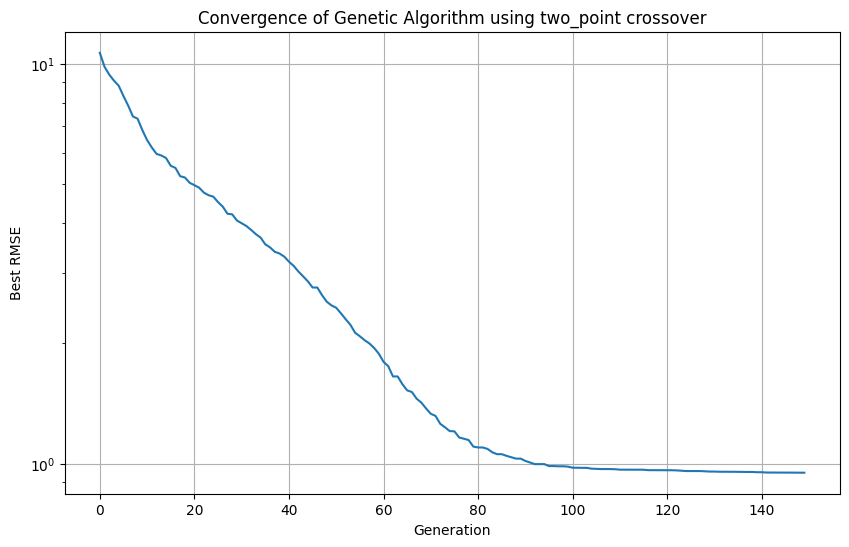


Best coefficients: [2.0083569981961493, 0.024712882429351768, 0.05775670679785866, -0.012346722841191093, 0.018538981586545267, 0.008598033647547298, 0.03648619856966062, -0.02974888415233856, 0.025490720766651098, 0.008052982299590616, -0.015596158674304583, 0.01883677201977957, -0.02499798533035935, 0.00899957872240914, -0.010734094861944099, 0.034751686340944776, -0.028319877799886595, 0.016957285634242703, 0.003434716741120447, 0.03025103853095651, -0.03794795162273873, 3.9712338444552393, -2.01291210052331, 1.3349967801844969, -1.0246272238571092, 0.7932539113093081, -0.6322357905427761, 0.5626609874852813, -0.45295025158263336, 0.4474486851178981, -0.37223860727855235, 0.3847180919794507, -0.3408361856886614, 0.25884363160521046, -0.24075644651788886, 0.22862884529273403, -0.24940642969562876, 0.1700108176231807, -0.20897971618843542, 0.18548371361706784, -0.23158173476003663]


In [22]:
if __name__ == "__main__":
    fSamples = getTargetFunction("linear")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "linear", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)


Optimizing gaussian function with:
- Population size: 200
- Generations: 150
- Fitness metric: rmse
- Crossover type: two_point
- Number of Fourier terms: 20
Generation 1: Fitness: 0.010101, RMSE: 9.949747, MAE: 8.133058, R²: -3753.525311
Generation 11: Fitness: 0.026259, RMSE: 6.171090, MAE: 4.944295, R²: -1443.291165
Generation 21: Fitness: 0.041196, RMSE: 4.926900, MAE: 3.922001, R²: -919.615849
Generation 31: Fitness: 0.063053, RMSE: 3.982429, MAE: 3.141370, R²: -600.488117
Generation 41: Fitness: 0.107530, RMSE: 3.049546, MAE: 2.421721, R²: -351.696678
Generation 51: Fitness: 0.229896, RMSE: 2.085617, MAE: 1.710844, R²: -163.968107
Generation 61: Fitness: 0.437987, RMSE: 1.511018, MAE: 1.223672, R²: -85.590475
Generation 71: Fitness: 1.389967, RMSE: 0.848199, MAE: 0.665646, R²: -26.285163
Generation 81: Fitness: 3.760281, RMSE: 0.515691, MAE: 0.422716, R²: -9.085808
Generation 91: Fitness: 7.262540, RMSE: 0.371070, MAE: 0.304031, R²: -4.222067
Generation 101: Fitness: 13.058063, 

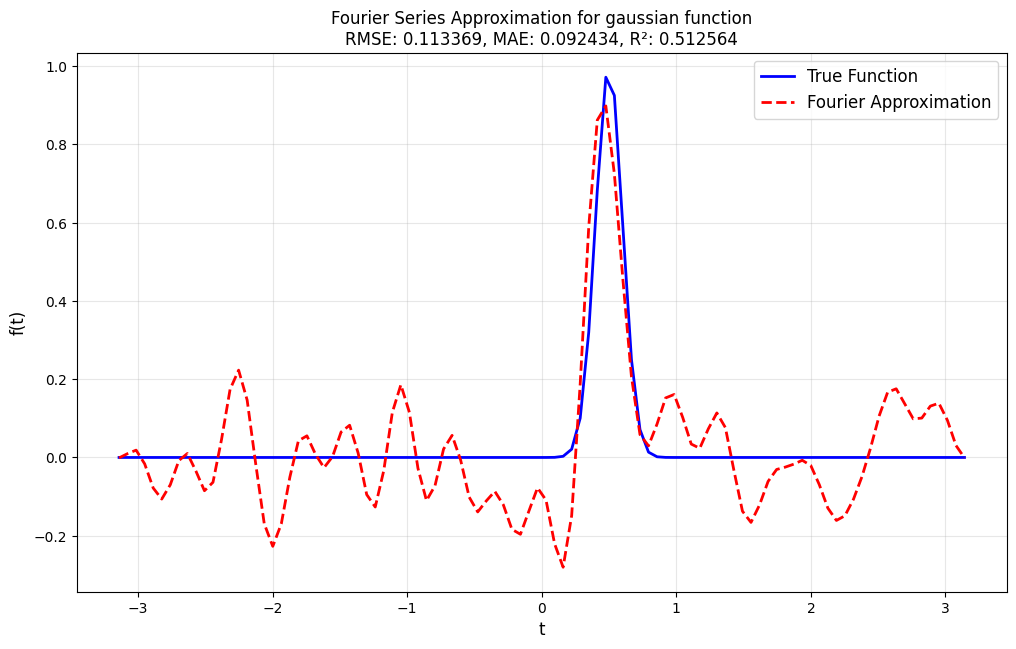

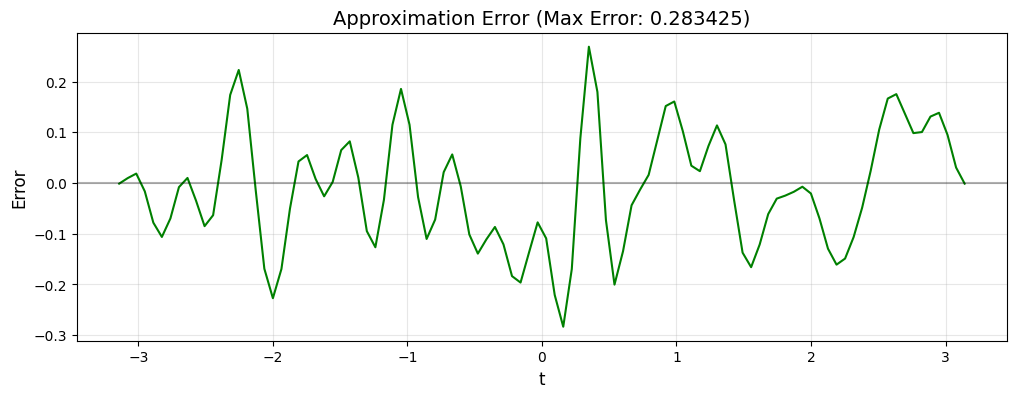


Significant Fourier coefficients (sorted by magnitude):
b3 = 0.1116
b9 = -0.0900
b2 = 0.0768
b5 = 0.0740
a6 = -0.0705
b12 = -0.0624
a4 = -0.0582
a7 = -0.0555
a3 = -0.0545
b16 = 0.0535
a0 = 0.0533
a14 = 0.0497
a8 = -0.0483
a9 = -0.0447
b1 = 0.0430


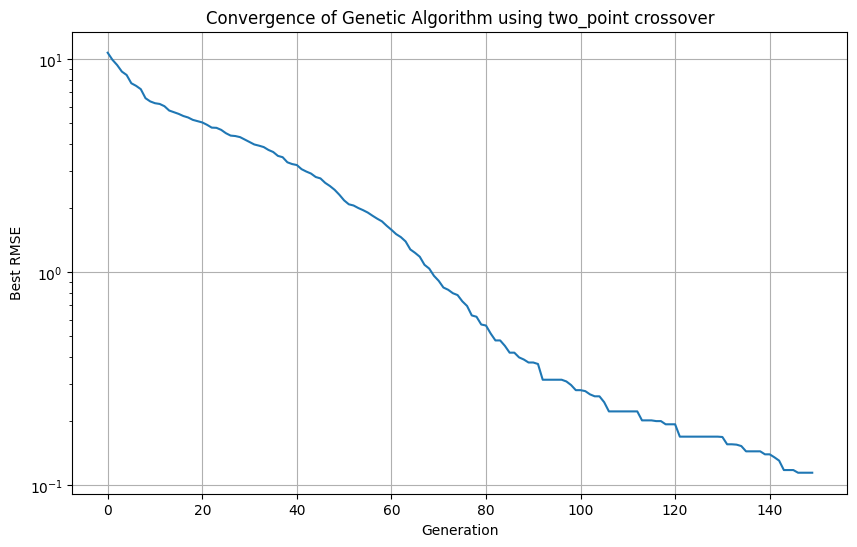


Best coefficients: [0.05329798666830726, 0.03438292456855985, 0.033247550841489726, -0.054533070347470736, -0.058194011534266454, -0.04188316932796754, -0.07054627372953798, -0.055460564219837694, -0.04831187766597245, -0.044686203132987656, -0.004663643484980329, 0.02892609803398255, 0.030247523867031556, 0.03391316039588038, 0.04969188615880993, 0.004656716857402432, -0.010751793527989884, 0.031164640652032616, 0.014786335462433797, 0.02440434818894932, -0.0023954957366804086, 0.043031972713306776, 0.07676516588917093, 0.11163113929553758, 0.04290162580591933, 0.07403387942949169, -0.008101098216321045, 0.01709743057203844, -0.023512113847546978, -0.09004089683902244, -0.029501536274978923, -0.024180249957887034, -0.062401437548045335, -0.014571926180300399, -0.013470751892780852, 0.0024766022416812805, 0.05348878919492922, 0.015020897777492603, -0.004463783876404226, -0.0049620320683402275, 0.0032755040848724826]


In [23]:
if __name__ == "__main__":
    fSamples = getTargetFunction("gaussian")(tSamples)
    
    best = run_optimization_for_samples(
        tSamples, 
        fSamples, 
        "gaussian", 
        num_fourier_terms=20,
        fitness_metric="rmse",
    )
    
    print("\nBest coefficients:", best.coefficients)

# <span style="color: #3498db;">Minmax Algorithm</span>

In [1]:
import random
import numpy as np
from math import inf
import time
import pygame

pygame 2.6.1 (SDL 2.28.4, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
class PentagoGame:
    def __init__(self, ui=False, print=False, depth=2):
        self.board = np.zeros((6, 6), dtype=int)
        self.current_player = 1
        self.ui = ui
        self.depth = depth
        self.nodes_visited = 0
        self.game_over = False
        self.result = None
        self.selected_block = None
        self.move_stage = 0
        self.temp_piece = None
        self.print = print
        self.transposition = {}


        if ui:
            pygame.font.init()
            self.screen = pygame.display.set_mode((800, 600))
            pygame.display.set_caption("Pygame Board")
            # self.font = pygame.font.SysFont("Arial", 20)
            self.show_buttons = False
            self.buttons = {
                "rotate_cw": pygame.Rect(650, 200, 100, 50),
                "rotate_ccw": pygame.Rect(650, 300, 100, 50),
            }
            self.setup_controls()
            self.draw_board()

    def setup_controls(self):
        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])   # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.screen.draw_text("CLOCKWISE", self.buttons["rotate_cw"].center)
            self.screen.draw_text("COUNTER-CLOCKWISE", self.buttons["rotate_ccw"].center)

    def hide_rotation_buttons(self):
        self.show_buttons = False

    def show_rotation_buttons(self):
        self.show_buttons = True

    def copy_board(self, board):
        return np.copy(board)

    def rotate_block(self, board, block, direction):
        row_start = (block // 2) * 3
        col_start = (block % 2) * 3
        sub = board[row_start : row_start + 3, col_start : col_start + 3]
        rotated = np.rot90(sub, 3 if direction == "cw" else 1)
        board[row_start : row_start + 3, col_start : col_start + 3] = rotated

    def get_possible_moves(self, board, player):
        moves = []
        for i in range(6):
            for j in range(6):
                if board[i][j] != 0:
                    continue
                placed_block = (i // 3) * 2 + (j // 3)
                for block in range(4):
                    row_start = (block // 2) * 3
                    col_start = (block % 2) * 3
                    sub_block = board[row_start:row_start+3, col_start:col_start+3]
                    if np.all(sub_block == 0):
                        if placed_block != block:
                            moves.append((i, j, block, 'cw'))
                            continue
                    moves.append((i, j, block, 'cw'))
                    moves.append((i, j, block, 'ccw'))
        return moves

    def apply_move(self, board, move, player):
        new_board = self.copy_board(board)
        row, col, block, direction = move
        if new_board[row][col] != 0:
            return None
        new_board[row][col] = player
        self.rotate_block(new_board, block, direction)
        return new_board

    def check_winner(self, board):
        for i in range(6):
            for j in range(6):
                if board[i][j] == 0:
                    continue

                # Horizontal
                if j <= 1 and np.all(board[i, j : j + 5] == board[i][j]):
                    return board[i][j]

                # Vertical
                if i <= 1 and np.all(board[i : i + 5, j] == board[i][j]):
                    return board[i][j]

                # Diagonal
                if (
                    i <= 1
                    and j <= 1
                    and all(board[i + k][j + k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]

                # Anti-diagonal
                if (
                    i <= 1
                    and j >= 4
                    and all(board[i + k][j - k] == board[i][j] for k in range(5))
                ):
                    return board[i][j]
        if np.all(board != 0):
            return 0
        return None
    def minimax(self, board=None, depth=None, maximizing=False, alpha=-float('inf'), beta=float('inf')):
        if board is None:
            board = self.board
        if depth is None:
            depth = self.depth

        key = (board.tobytes(), depth, maximizing)
        if key in self.transposition:
            return self.transposition[key]

        if self.game_over:
            return 0

        winner = self.check_winner(board)
        if winner is not None:
            val = { -1:100, 1:-100, 0:0 }[winner]
            self.transposition[key] = val
            return val
        if depth == 0:
            val = self.evaluate_board(board)
            self.transposition[key] = val
            return val

        self.nodes_visited += 1
        if maximizing:
            max_eval = -float('inf')
            for move in self.get_possible_moves(board, -1):
                newb = self.apply_move(board, move, -1)
                if newb is None:
                    continue
                ev = self.minimax(newb, depth-1, False, alpha, beta)
                max_eval = max(max_eval, ev)
                alpha = max(alpha, ev)
                if beta <= alpha:
                    break
            self.transposition[key] = max_eval
            return max_eval
        else:
            min_eval = float('inf')
            for move in self.get_possible_moves(board, 1):
                newb = self.apply_move(board, move, 1)
                if newb is None:
                    continue
                ev = self.minimax(newb, depth-1, True, alpha, beta)
                min_eval = min(min_eval, ev)
                beta = min(beta, ev)
                if beta <= alpha:
                    break
            self.transposition[key] = min_eval
            return min_eval
    def evaluate_board(self, board):
        score = 0
        for i in range(6):
            for j in range(2):
                line = board[i, j:j+5]
                score += self.evaluate_line(line)
        
        for i in range(2):
            for j in range(6):
                line = board[i:i+5, j]
                score += self.evaluate_line(line)
        
        for i in range(2):
            for j in range(2):
                line = [board[i+k][j+k] for k in range(5)]
                score += self.evaluate_line(line)
        
        for i in range(2):
            for j in range(4, 6):
                line = [board[i+k][j-k] for k in range(5)]
                score += self.evaluate_line(line)
        
        return score
    def evaluate_line(self, line):
        computer_count = np.sum(line == -1)
        human_count = np.sum(line == 1)
        
        if computer_count > 0 and human_count > 0:
            return 0
        
        score_table = [0, 1, 10, 100, 1000, 10000]
        if computer_count > 0:
            return score_table[computer_count]
        elif human_count > 0:
            return -score_table[human_count]
        return 0
    
    def get_computer_move(self):
        self.transposition.clear()
        start_time = time.time()
        best_move = None
        best_value = -float('inf')
        alpha = -float('inf')
        beta = float('inf')

        moves = self.get_possible_moves(self.board, -1)
        if not moves:
            return None

        scored_moves = []
        for move in moves:
            new_board = self.apply_move(self.board, move, -1)
            if new_board is None:
                continue
            score = self.evaluate_board(new_board)
            scored_moves.append((-score, move))
        
        scored_moves.sort()
        sorted_moves = [move for (_, move) in scored_moves]
        
        best_move = sorted_moves[0] if sorted_moves else moves[0]

        for move in sorted_moves:
            if self.game_over:
                break
            newb = self.apply_move(self.board, move, -1)
            if newb is None: continue

            value = self.minimax(new_board, self.depth-1, False, alpha, beta)
            if value > best_value:
                best_value = value
                best_move = move
                
            alpha = max(alpha, best_value)
            if beta <= alpha:
                break 

        if self.print:
            print(f"Move took {time.time()-start_time:.2f}s, nodes visited: {self.nodes_visited}")
        self.nodes_visited = 0
        return best_move

    def draw_text(self, text, center_pos, max_width):
        font_size = 24
        font = pygame.font.Font(None, font_size)
        text_surface = font.render(text, True, (0, 0, 0))

        text_width = text_surface.get_width()
        if text_width > max_width:
            scale_factor = max_width / text_width
            new_font_size = int(font_size * scale_factor)
            font = pygame.font.Font(None, new_font_size)
            text_surface = font.render(text, True, (0, 0, 0))

        text_rect = text_surface.get_rect(center=center_pos)
        self.screen.blit(text_surface, text_rect)

    def draw_board(self):
        self.screen.fill((0, 0, 0))

        for i in range(6):
            for j in range(6):
                x0 = j * 100
                y0 = i * 100

                if self.board[i][j] == 1:
                    pygame.draw.circle(self.screen, (255, 0, 0), (x0 + 50, y0 + 50), 40)
                elif self.board[i][j] == -1:
                    pygame.draw.circle(self.screen, (0, 0, 255), (x0 + 50, y0 + 50), 40)

                pygame.draw.rect(self.screen, (255, 255, 255), (x0, y0, 100, 100), 1)

        for i in [3, 6]:
            pygame.draw.line(self.screen, (255, 255, 255), (0, i * 100), (600, i * 100), 3)  # Horizontal
            pygame.draw.line(self.screen, (255, 255, 255), (i * 100, 0), (i * 100, 600), 3)  # Vertical

        # Show rotation buttons if in move_stage 2
        if self.move_stage == 2:
            self.highlight_selected_block()
            self.show_rotation_buttons()

        if self.show_buttons:
            pygame.draw.rect(self.screen, (144, 238, 144), self.buttons["rotate_cw"])  # Light Green
            pygame.draw.rect(self.screen, (173, 216, 230), self.buttons["rotate_ccw"])  # Light Blue

            self.draw_text(
                "CLOCKWISE",
                self.buttons["rotate_cw"].center,
                self.buttons["rotate_cw"].width,
            )
            self.draw_text(
                "COUNTER-CLOCKWISE",
                self.buttons["rotate_ccw"].center,
                self.buttons["rotate_ccw"].width,
            )

    def click_handler(self, event):
        if self.game_over or self.current_player != 1:
            return

        x, y = event.pos
        if self.move_stage == 0:  # Place piece
            if x > 600:
                return  # clicks on control area
            col = x // 100
            row = y // 100
            if 0 <= row < 6 and 0 <= col < 6 and self.board[row][col] == 0:
                self.temp_piece = (row, col)
                self.board[row][col] = 1
                self.move_stage = 1
                self.draw_board()

        elif self.move_stage == 1:  # Select block
            if x > 600:
                return
            # which block was clicked
            block_x = 0 if x < 300 else 1
            block_y = 0 if y < 300 else 1
            self.selected_block = block_y * 2 + block_x
            self.move_stage = 2
            self.show_rotation_buttons()
            self.highlight_selected_block()

        elif self.move_stage == 2:  # Rotate
            if self.buttons["rotate_cw"].collidepoint(event.pos):
                self.apply_rotation("cw")
            if self.buttons["rotate_ccw"].collidepoint(event.pos):
                self.apply_rotation("ccw")

    def apply_rotation(self, direction):
        self.rotate_block(self.board, self.selected_block, direction)
        self.current_player = -1
        self.move_stage = 0
        self.selected_block = None
        self.temp_piece = None
        self.hide_rotation_buttons()
        self.draw_board()
        pygame.display.flip()
        self.check_game_over()
        pygame.time.delay(1000)
        self.play_computer_move()

    def highlight_selected_block(self):
        colors = [
            (255, 153, 153),
            (153, 255, 153),
            (153, 153, 255),
            (255, 255, 153),
        ]  # RGB colors

        row_start = (self.selected_block // 2) * 3
        col_start = (self.selected_block % 2) * 3

        pygame.draw.rect(
            self.screen,
            colors[self.selected_block],
            (col_start * 100, row_start * 100, 300, 300),
            5,
        )

    def play_computer_move(self):
        move = self.get_computer_move()
        if move and not self.game_over:
            new_board = self.apply_move(self.board, move, -1)
            if new_board is not None:
                self.board = new_board
                self.current_player = 1
                self.draw_board()
                pygame.display.flip()
                self.check_game_over()
            else:
                print("Invalid computer move!")

    def check_game_over(self):
        winner = self.check_winner(self.board)
        if winner is not None:
            self.game_over = True
            self.result = winner
            print("Game over! Result:", winner)
            if self.ui:
                self.show_game_over_message()

    def show_game_over_message(self):
        self.screen.fill((200, 200, 200))
        pygame.draw.rect(self.screen, (255, 255, 255), (100, 200, 500, 200))
        pygame.draw.rect(self.screen, (0, 0, 0), (100, 200, 500, 200), 3)

        result_text = f"Player {self.result} wins!" if self.result != 0 else "Draw!"
        text_surface = self.font_large.render(result_text, True, (255, 0, 0))
        self.screen.blit(text_surface, (250, 250))

        exit_text = self.font_small.render("Click anywhere to exit", True, (0, 0, 0))
        self.screen.blit(exit_text, (230, 350))
        pygame.display.flip()

    def play(self):
        if self.ui:
            running = True
            while running:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        running = False
                    elif event.type == pygame.MOUSEBUTTONDOWN:
                        self.click_handler(event)
                self.draw_board()
                pygame.display.flip()
            pygame.quit()
            return self.result
        else:
            while not self.game_over:
                self.print_board()
                winner = self.check_winner(self.board)
                if winner is not None:
                    return winner

                if self.current_player == 1:
                    move = random.choice(self.get_possible_moves(self.board, 1))
                else:
                    move = self.get_computer_move()

                self.board = self.apply_move(self.board, move, self.current_player)
                self.current_player *= -1
            return self.result

    def print_board(self):
        if self.print == False:
            return
        print("-" * 25)
        for row in self.board:
            print(" ".join(f"{x:2}" for x in row))
        print("-" * 25)

In [25]:
if __name__ == "__main__":
    numGames = 100
    numWins, numTies, numLosses = 0, 0, 0
    for i in range(numGames):
        game = PentagoGame(ui=False, print=True, depth=1)
        result = game.play()
        if result == -1:
            numWins += 1
        elif result == 0:
            numTies += 1
        else:
            numLosses += 1

    print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  1  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 0.07s, nodes visited: 0
-------------------------
 0  0  0  0  1  0
 0  0 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  0  0
 0  0 -1  0  0  1
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 0.09s, nodes visited: 0
-------------------------
 0  0  0  0  1  0
 0  0 -1  0 -1  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  1  1
 0  0 -1  0 -1  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
 0  0  0  0  0  

In [4]:
if __name__ == "__main__":
    numGames = 100
    numWins, numTies, numLosses = 0, 0, 0
    for i in range(numGames):
        game = PentagoGame(ui=False, print=True, depth=2)
        result = game.play()
        if result == -1:
            numWins += 1
        elif result == 0:
            numTies += 1
        else:
            numLosses += 1

    print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 1  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 0.16s, nodes visited: 1
-------------------------
 1  0  0  0  0  0
 0  0 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 1  0  0  0  0  0
 0  0 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 0.14s, nodes visited: 1
-------------------------
 1  0  0  0  0  0
 0 -1 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  1  0  0
-------------------------
-------------------------
 1  0  0  0  0  0
 0 -1 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
 0  0  0  0  0  0
 0  0  0  0  0  

In [ ]:
if __name__ == "__main__":
    numGames = 100
    numWins, numTies, numLosses = 0, 0, 0
    for i in range(numGames):
        game = PentagoGame(ui=False, print=True, depth=3)
        result = game.play()
        if result == -1:
            numWins += 1
        elif result == 0:
            numTies += 1
        else:
            numLosses += 1

    print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  1  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 0.96s, nodes visited: 168
-------------------------
 0  1  0  0  0  0
 0  0  0  0  0  0
 0  0  0 -1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  1  0 -1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  1
-------------------------
Move took 1.70s, nodes visited: 222
-------------------------
 0  1  0  0  0  0
 0  0  0 -1  0  0
 0  0  0 -1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  1
-------------------------
-------------------------
 0  1  0  0  0  0
 0  0  0 -1  0  0
 0  0  0 -1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  1  0  1 

In [7]:
if __name__ == "__main__":
    numGames = 1
    numWins, numTies, numLosses = 0, 0, 0
    for i in range(numGames):
        game = PentagoGame(ui=False, print=True, depth=5)
        result = game.play()
        if result == -1:
            numWins += 1
        elif result == 0:
            numTies += 1
        else:
            numLosses += 1

    print(f"{numWins} wins, {numTies} ties, {numLosses} losses")

-------------------------
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  0  0
 0  0  1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
Move took 923.35s, nodes visited: 135774
-------------------------
 0  1  0  0  0  0
 0  0  0  0  0  0
 0 -1  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
-------------------------
-------------------------
 0  0  0  0  0  0
-1  0  1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
-------------------------
Move took 627.72s, nodes visited: 91887
-------------------------
 0  1  0  0  0  0
 0  0  0  0  0  0
 0 -1 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  0
-------------------------
-------------------------
 0  0 -1  1  0  0
 1  0 -1  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0 